In [45]:
%run ../utils/configuration.ipynb

In [46]:
import sys
import polars as pl
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

In [48]:
df=pd.read_parquet(f'{silver_path}/Telco_customer_churn_model_training.parquet') 

In [49]:
df.head()

,number_of_referrals,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,...,total_extra_data_charges,total_revenue,gender,age,number_of_dependents,satisfaction_score,churn_value,churn_score,cltv,population
0,0,2,0,0.00,0,1,1,8,0,0,...,1,59.65,1,78,0,3.0,1,91,5433,68701
1,1,5,1,48.85,1,1,3,17,0,1,...,0,1024.10,0,74,1,3.0,1,69,5302,55668
2,0,4,1,11.33,1,1,3,52,0,0,...,0,1910.88,1,71,1,2.0,1,81,3179,47534
3,1,3,1,19.76,0,1,3,12,0,1,...,0,2995.07,0,78,1,2.0,1,88,5337,27778
4,1,3,1,6.33,1,1,3,14,0,0,...,0,3102.36,0,80,1,2.0,1,67,2793,26265


In [50]:
df.shape

(7043, 34)

| Feature                           | Decision Tree | RFE-8   | RFE-10  | RFE-15  | Chi-Squared |
| --------------------------------- | ------------- | ------- | ------- | ------- | ----------- |
| number_of_referrals               | **YES**       | **YES** | **YES** | **YES** | **YES**     |
| offer                             | **YES**       | NO      | NO      | NO      | **YES**     |
| phone_service                     | NO            | NO      | **YES** | **YES** | NO          |
| avg_monthly_long_distance_charges | **YES**       | NO      | NO      | NO      | NO          |
| multiple_lines                    | NO            | NO      | NO      | NO      | **YES**     |
| internet_service                  | NO            | NO      | NO      | NO      | **YES**     |
| internet_type                     | NO            | NO      | NO      | NO      | **YES**     |
| avg_monthly_gb_download           | **YES**       | NO      | NO      | NO      | **YES**     |
| online_security                   | NO            | NO      | NO      | **YES** | **YES**     |
| online_backup                     | NO            | NO      | NO      | **YES** | **YES**     |
| device_protection_plan            | NO            | NO      | NO      | NO      | **YES**     |
| premium_tech_support              | **YES**       | NO      | NO      | **YES** | **YES**     |
| streaming_tv                      | NO            | NO      | NO      | NO      | **YES**     |
| streaming_movies                  | NO            | NO      | NO      | NO      | **YES**     |
| streaming_music                   | **YES**       | NO      | NO      | NO      | **YES**     |
| unlimited_data                    | NO            | NO      | NO      | NO      | **YES**     |
| contract                          | **YES**       | **YES** | **YES** | **YES** | **YES**     |
| paperless_billing                 | NO            | NO      | NO      | NO      | **YES**     |
| payment_method_Bank Withdrawal    | NO            | NO      | NO      | NO      | **YES**     |
| payment_method_Credit Card        | **YES**       | NO      | NO      | **YES** | **YES**     |
| payment_method_Mailed Check       | NO            | **YES** | **YES** | **YES** | **YES**     |
| monthly_charge                    | **YES**       | **YES** | **YES** | **YES** | **YES**     |
| total_charges                     | **YES**       | **YES** | **YES** | **YES** | NO          |
| total_refunds                     | NO            | **YES** | **YES** | **YES** | **YES**     |
| total_extra_data_charges          | NO            | NO      | NO      | NO      | **YES**     |
| total_revenue                     | **YES**       | NO      | NO      | **YES** | **YES**     |
| gender                            | NO            | NO      | NO      | NO      | NO          |
| age                               | **YES**       | **YES** | **YES** | **YES** | **YES**     |
| number_of_dependents              | **YES**       | **YES** | **YES** | **YES** | **YES**     |
| cltv                              | **YES**       | NO      | NO      | NO      | NO          |
| population                        | **YES**       | NO      | **YES** | **YES** | **YES**     |


In [ ]:
#Yes across all methods
df_1_columns = [
    "number_of_referrals",
    "contract",
    "monthly_charge",
    "age",
    "number_of_dependents",
    "churn_value"
]

df_1 = df[df_1_columns].copy()
df_1.head()

,number_of_referrals,contract,monthly_charge,age,number_of_dependents,churn_value
0,0,1,39.65,78,0,1
1,1,1,80.65,74,1,1
2,0,1,95.45,71,1,1
3,1,1,98.50,78,1,1
4,1,1,76.50,80,1,1


In [ ]:
#4 Yes across all methods
df_2_columns = [
    "number_of_referrals",
    "offer",
    "online_security",
    "online_backup",
    "premium_tech_support",
    "contract",
    "payment_method_Mailed Check",
    "monthly_charge",
    "total_charges",
    "total_refunds",
    "total_revenue",
    "age",
    "number_of_dependents",
    "population",
    "churn_value"
]

df_2 = df[df_2_columns].copy()
df_2.head()

,number_of_referrals,offer,online_security,online_backup,premium_tech_support,contract,payment_method_Mailed Check,monthly_charge,total_charges,total_refunds,total_revenue,age,number_of_dependents,population,churn_value
0,0,2,0,0,0,1,0,39.65,39.65,0.0,59.65,78,0,68701,1
1,1,5,0,1,0,1,0,80.65,633.30,0.0,1024.10,74,1,55668,1
2,0,4,0,0,0,1,0,95.45,1752.55,1.0,1910.88,71,1,47534,1
3,1,3,0,1,0,1,0,98.50,2514.50,1.0,2995.07,78,1,27778,1
4,1,3,0,0,0,1,0,76.50,2868.15,0.0,3102.36,80,1,26265,1


In [ ]:
#3 Yes across all methods
df_3_columns = [
    "number_of_referrals",
    "offer",
    "phone_service",
    "avg_monthly_long_distance_charges",
    "avg_monthly_gb_download",
    "online_security",
    "online_backup",
    "premium_tech_support",
    "streaming_music",
    "contract",
    "payment_method_Credit Card",
    "payment_method_Mailed Check",
    "monthly_charge",
    "total_charges",
    "total_refunds",
    "total_revenue",
    "age",
    "number_of_dependents",
    "population",
    "churn_value"
]

df_3 = df[df_3_columns].copy()
df_3.head()

,number_of_referrals,offer,phone_service,avg_monthly_long_distance_charges,avg_monthly_gb_download,online_security,online_backup,premium_tech_support,streaming_music,contract,payment_method_Credit Card,payment_method_Mailed Check,monthly_charge,total_charges,total_refunds,total_revenue,age,number_of_dependents,population,churn_value
0,0,2,0,0.00,8,0,0,0,0,1,0,0,39.65,39.65,0.0,59.65,78,0,68701,1
1,1,5,1,48.85,17,0,1,0,0,1,1,0,80.65,633.30,0.0,1024.10,74,1,55668,1
2,0,4,1,11.33,52,0,0,0,1,1,0,0,95.45,1752.55,1.0,1910.88,71,1,47534,1
3,1,3,1,19.76,12,0,1,0,0,1,0,0,98.50,2514.50,1.0,2995.07,78,1,27778,1
4,1,3,1,6.33,14,0,0,0,0,1,0,0,76.50,2868.15,0.0,3102.36,80,1,26265,1


In [61]:
def select_best_models(data, model):
    skf = StratifiedKFold(n_splits = 5, random_state = 99, shuffle = True)
    X = data.drop('churn_value', axis = 1)
    y = data['churn_value'].copy()

    train_results,val_results = [],[]
    # perform the cross-validation
    for train_index, val_index in skf.split(X,y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # scale the data
        X_train = apply_scale(X_train)
        X_val = apply_scale(X_val)

        # apply model
        model.fit(X_train, y_train)
        predictions_train = model.predict(X_train)
        predictions_val = model.predict(X_val)

        train_results.append((y_train, predictions_train))
        val_results.append((y_val, predictions_val))
    return train_results, val_results

def apply_score(train_results, val_results, score):
    score_train, score_val = [],[]

    for reference, prediction in train_results:
        score_train.append(score(reference, prediction))

    for reference, prediction in val_results:
        score_val.append(score(reference, prediction))
    # print(score_train)
    # print(score_val)
    avg_train = round(np.mean(score_train),3)
    avg_val = round(np.mean(score_val),3)
    std_train = round(np.std(score_train),4)
    std_val = round(np.std(score_val),4)

    return avg_train, std_train, avg_val, std_val

def show_results(df, data, score,*args):
    count = 0
    # for each instance of model passed as argument
    for arg in args:
        train_results, val_results  = select_best_models(data, arg)
        avg_train, std_train, avg_val, std_val = apply_score(train_results, val_results, score)#)#)
        # store the results in the right row
        df.iloc[count] = str(avg_train) + '+/-' + str(std_train), str(avg_val) + '+/-' + str(std_val)
        count+=1
    return df

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [55]:
model_KNN = KNeighborsClassifier()

In [57]:
def apply_scale(dataframe):
    scaler = MinMaxScaler().fit(dataframe)
    return scaler.transform(dataframe)

In [58]:
df_all = pd.DataFrame(columns = ['Train','Validation'], index = ['KNN'])
print('------------------------------------------')
print('f1_score')
print('------------------------------------------')
display(show_results(df_all, df_1,f1_score, model_KNN))

------------------------------------------
f1_score
------------------------------------------


,Train,Validation
KNN,0.728+/-0.0064,0.604+/-0.0205


In [59]:
print('precision_score')
print('------------------------------------------')
display(show_results(df_all, df_1,precision_score, model_KNN))

precision_score
------------------------------------------


,Train,Validation
KNN,0.757+/-0.0063,0.634+/-0.019


In [ ]:
df_all = pd.DataFrame(columns = ['Train','Validation'], index = ['KNN'])
print('------------------------------------------')
print('f1_score')
print('------------------------------------------')
display(show_results(df_all, df_2,f1_score, model_KNN))

In [62]:
df_all = pd.DataFrame(columns = ['Train','Validation'], index = ['KNN'])
print('------------------------------------------')
print('f1_score')
print('------------------------------------------')
display(show_results(df_all, df_1,f1_score, model_KNN))
print('precision_score')
print('------------------------------------------')
display(show_results(df_all, df_1,precision_score, model_KNN))

------------------------------------------
f1_score
------------------------------------------


,Train,Validation
KNN,0.728+/-0.0064,0.604+/-0.0205


precision_score
------------------------------------------


,Train,Validation
KNN,0.757+/-0.0063,0.634+/-0.019


In [65]:
df_all = pd.DataFrame(columns = ['Train','Validation'], index = ['KNN'])
print('------------------------------------------')
print('f1_score')
print('------------------------------------------')
display(show_results(df_all, df_3,f1_score, model_KNN))
print('precision_score')
print('------------------------------------------')
display(show_results(df_all, df_3,precision_score, model_KNN))

------------------------------------------
f1_score
------------------------------------------


,Train,Validation
KNN,0.729+/-0.0069,0.618+/-0.0207


precision_score
------------------------------------------


,Train,Validation
KNN,0.769+/-0.0072,0.646+/-0.0216


Model Optimization

In [66]:
def point_plot(train, validation, values_try):
    sns.pointplot(x=values_try, y=train, color = 'teal', label = 'Train')
    sns.pointplot(x=values_try, y=validation, color = 'goldenrod', label = 'Validation')
    plt.legend()

In [67]:
def get_models_knn(data, values):
    models = dict()
    results_train, results_val, names = [],[],[]

    # create the instances of each model with different values
    for value in values:
        models['neighbors_' + str(value)] = KNeighborsClassifier(n_neighbors = value)

    for name, model in models.items():
        train_results, val_results  = select_best_models(data, model)
        avg_train, std_train, avg_val, std_val = apply_score(train_results, val_results, f1_score)
        results_train.append(avg_train)
        results_val.append(avg_val)
        names.append(name)

    print(results_train)
    print(results_val)

    return results_train, results_val

[0.994, 0.775, 0.728, 0.705, 0.696, 0.687, 0.679, 0.669, 0.661, 0.654]
[0.564, 0.599, 0.604, 0.614, 0.62, 0.62, 0.616, 0.618, 0.615, 0.617]


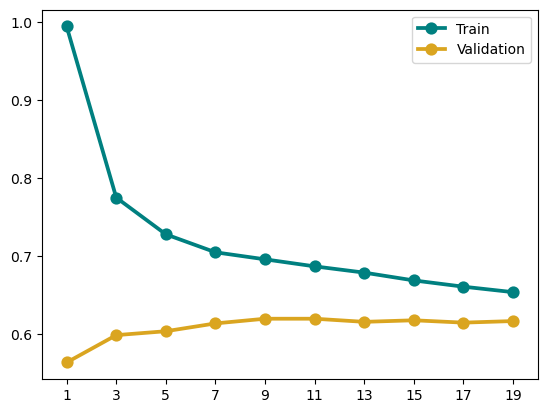

In [68]:
values_try = [1,3,5,7,9,11,13,15,17,19]
results_train, results_val = get_models_knn(df_1, values_try)
point_plot(results_train, results_val, values_try)

[1.0, 0.772, 0.723, 0.701, 0.685, 0.673, 0.669, 0.662, 0.656, 0.656]
[0.581, 0.596, 0.614, 0.617, 0.617, 0.619, 0.623, 0.625, 0.618, 0.622]


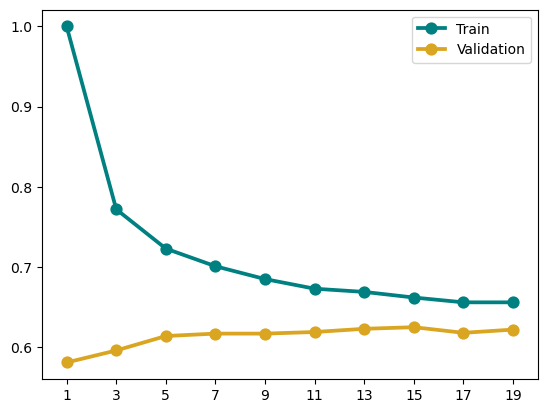

In [69]:
values_try = [1,3,5,7,9,11,13,15,17,19]
results_train, results_val = get_models_knn(df_2, values_try)
point_plot(results_train, results_val, values_try)

[1.0, 0.782, 0.729, 0.708, 0.688, 0.677, 0.672, 0.67, 0.667, 0.666]
[0.573, 0.603, 0.618, 0.614, 0.616, 0.62, 0.628, 0.627, 0.628, 0.637]


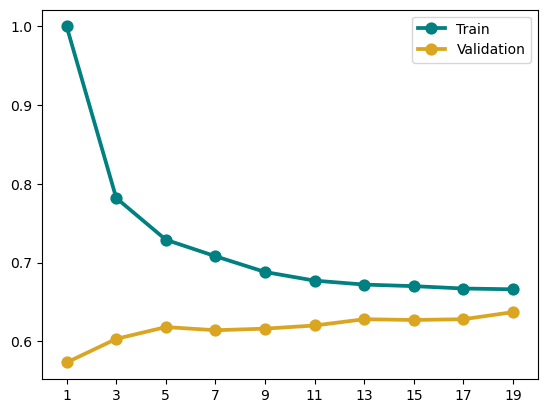

In [70]:
values_try = [1,3,5,7,9,11,13,15,17,19]
results_train, results_val = get_models_knn(df_3, values_try)
point_plot(results_train, results_val, values_try)